<a href="https://colab.research.google.com/github/intanelaqsha/intanelaqsha/blob/main/Data_Analyst_Main_Games_User_Behave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Membaca file CSV
df_premium = pd.read_csv('file_premium.csv')
df_regular = pd.read_csv('file_regular.csv')


In [ ]:
# Menyaring kolom yang relevan
relevant_cols = ['user_id', 'clip_id', 'gamesession_Id', 'event_name', 'game_name', 'duration', 'created_at', 'join_at']
df_premium = df_premium[relevant_cols]
df_regular = df_regular[relevant_cols]

# Membedakan pengguna premium dan regular
df_premium.loc[:, 'user_type'] = 'Premium'
df_regular.loc[:, 'user_type'] = 'Regular'

# Menggabungkan kedua data frame
df_combined = pd.concat([df_premium, df_regular])
df_combined.to_csv('COMBINE.csv', index=False)

<ipython-input-110-6a3fcfc8c60b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_premium.loc[:, 'user_type'] = 'Premium'


durasi rata-rata klip

In [ ]:
# Menghitung durasi rata-rata klip untuk setiap jenis pengguna
avg_duration = df_combined.groupby('user_type')['duration'].mean()

print(avg_duration)


user_type
Premium    47.924795
Regular    61.088101
Name: duration, dtype: float64


In [ ]:
# Menghitung jumlah kemunculan setiap event untuk setiap jenis pengguna
top_events = df_combined.groupby(['user_type', 'event_name']).size().reset_index(name='count')
top_events = top_events.sort_values(by='count', ascending=False).groupby('user_type').head(4)

print(top_events)


    user_type   event_name  count
132   Regular       Moment  86432
143   Regular  Single kill  63725
41    Premium  Single kill  50060
129   Regular        Kills  25879
135   Regular   Multi-kill  24932
30    Premium       Moment  24296
27    Premium        Kills  14769
11    Premium  Double kill  13802


user_type   Premium  Regular
created_at                  
2023-06-30    18001    63788
2023-07-31    20432    57344
2023-08-31    22220    58011
2023-09-30    25960    61777
2023-10-31    36907    51955
2023-11-30    41933    40675
2023-12-31    25187    27841


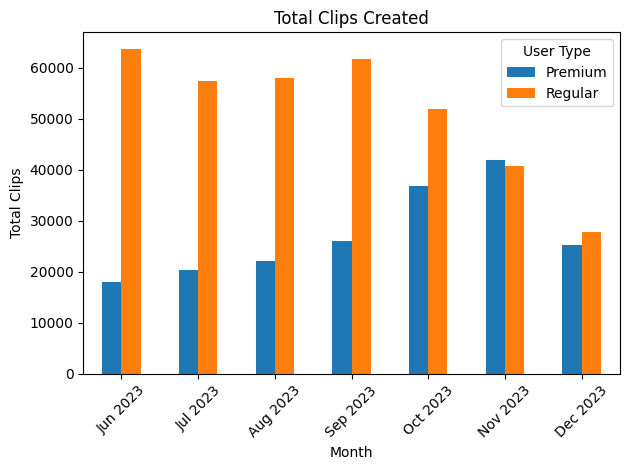

In [ ]:
# Mengubah kolom created_at dan join_at menjadi tipe datetime
df_combined['created_at'] = pd.to_datetime(df_combined['created_at'])

# Menghitung jumlah klip yang dibuat per bulan
clips_per_month = df_combined.groupby([pd.Grouper(key='created_at', freq='M'), 'user_type']).size().unstack()

print(clips_per_month)

import matplotlib.pyplot as plt

# Plot data menggunakan Matplotlib
clips_per_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Total Clips')
plt.title('Total Clips Created')


# Mengambil 7 karakter awal dari setiap label x
x_labels = [label[:9] for label in clips_per_month.index.strftime('%b %Y')]
plt.xticks(range(len(clips_per_month.index)), x_labels, rotation=45)  # Putar label x-axis agar lebih mudah dibaca

plt.legend(title='User Type')
plt.tight_layout()  # Mengatur layout agar tidak tumpang tindih

# Tampilkan plot
plt.show()



<ipython-input-114-ebf5275ae0f7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_duration.index, y=avg_duration.values, palette='viridis', width=0.6)


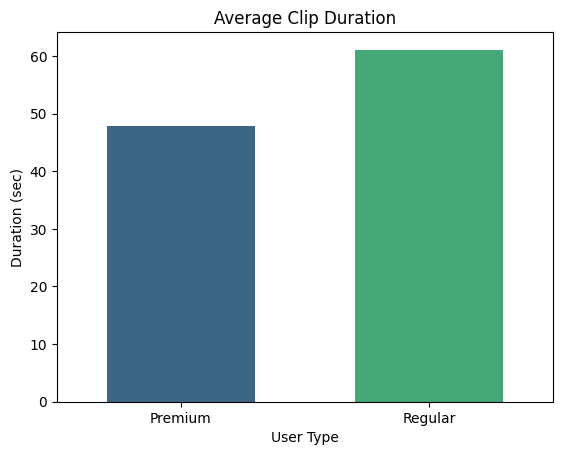

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi rata-rata durasi klip
sns.barplot(x=avg_duration.index, y=avg_duration.values, palette='viridis', width=0.6)
plt.title('Average Clip Duration')
plt.xlabel('User Type')
plt.ylabel('Duration (sec)')
plt.show()

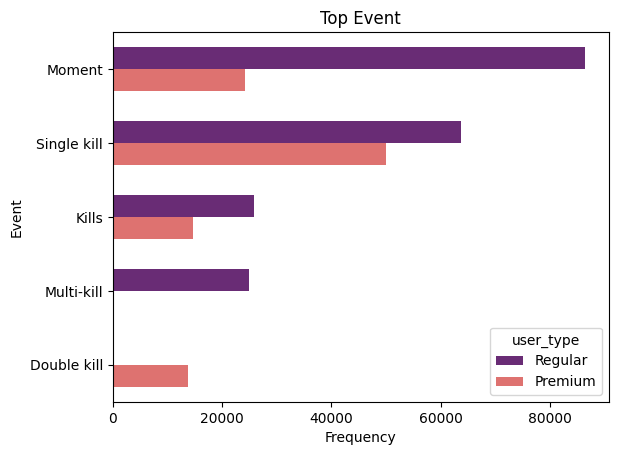

In [ ]:
# Visualisasi event yang paling sering dilihat
sns.barplot(x='count', y='event_name', hue='user_type', data=top_events, palette='magma', width=0.6)
plt.title('Top Event')
plt.xlabel('Frequency')
plt.ylabel('Event')
plt.show()



    user_type                game_name  count
83    Regular              Other Games  96995
58    Regular  COD: Warzone3-2 & MW3-2  79418
5     Premium  COD: Warzone3-2 & MW3-2  60887
67    Regular                 Fortnite  46749
101   Regular                 Valorant  33465
33    Premium              Other Games  32764
14    Premium                 Fortnite  19010
50    Premium                 Valorant  15121


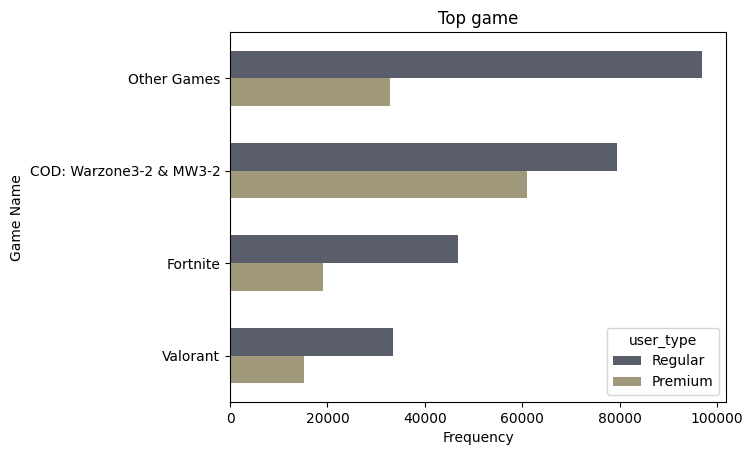

In [ ]:
# Menghitung jumlah kemunculan setiap event untuk setiap jenis pengguna
top_game = df_combined.groupby(['user_type', 'game_name']).size().reset_index(name='count')
top_game = top_game.sort_values(by='count', ascending=False).groupby('user_type').head(4)

print(top_game)

# Visualisasi event yang paling sering dilihat
sns.barplot(x='count', y='game_name', hue='user_type', data=top_game, palette='cividis', width=0.6)
plt.title('Top game')
plt.xlabel('Frequency')
plt.ylabel('Game Name')
plt.show()


